## Coyote or Dog
## Table of Content:
**1. [Project description](#section1)**

**2. [Data acquisition](#section2)**
* **2.1 [Package import](#section2.1)** 
* **2.2 [Change file names](#section2.2)**
* **2.3 [Move files into dataset](#section2.3)** 
* **2.4 [Pull images](#section2.4)** 

**3. [Overfitting refinement](#section3)**
* **3.1 [Pull three images from dogs & coyote](#section3.1)** 
* **3.2 [Standardize to same size](#section3.2)** 
* **3.3 [Create sub folders](#section3.3)** 

**4. [Trained model](#section4)**
* **4.1 [Dropout Regularization](#section4.1)** 
* **4.2 [Image Data Augmentation](#section4.2)** 
* **4.3 [Transfer Learning](#section4.3)** 

**5. [Model validation](#section5)**
* **5.1 [Final Dataset](#section5.1)** 
* **5.2 [Final model](#section5.2)** 
* **5.3 [Prediction](#section5.3)** 

# <b>Coyote or Dog</b>

<b>1. Project description</b>
<a id="section1"></a>

In this assignemnt we used deep learning model that can accurately distinguish coyotes from dogs based on photos.

<b>2. Data acquisition</b>
<a id="section2"></a>

<b>2.1</b> Import packages
<a id="section2.1"></a>

In [1]:
import os, sys
import shutil

from matplotlib import pyplot
from matplotlib.image import imread



<b>2.2</b> change file names to uniform names
<a id="section2.2"></a>

In [2]:
os.chdir('coyotes')
i=1
for file in os.listdir():
    src=file
    dst="coyote."+str(i)+".jpg"
    os.rename(src,dst)
    i+=1

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'coyotes'

In [3]:
os.chdir('dogs')
i=1
for file in os.listdir():
    src=file
    dst="dog."+str(i)+".jpg"
    os.rename(src,dst)
    i+=1

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'dogs'

<b>2.3</b> Move files into folder dataset
<a id="section2.3"></a>

In [4]:

source = 'dogs/'
destination = 'dataset_dogs_vs_coyotes/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, destination)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dogs/'

In [5]:
source = 'coyotes/'
destination = 'dataset_dogs_vs_coyotes/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, destination)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'coyotes/'

<b>3. Overfitting refinement</b>
<a id="section3"></a>

<b>3.1</b> Pull three images from dogs & coyote
<a id="section3.1"></a>

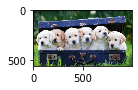

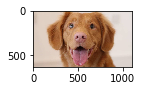

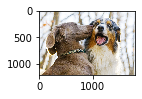

In [6]:
folder = 'dataset_dogs_vs_coyotes/'
for i in range(1,4):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
    pyplot.show()

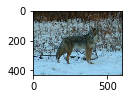

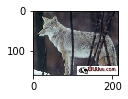

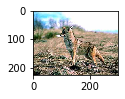

In [7]:
folder = 'dataset_dogs_vs_coyotes/'
for i in range(1,4):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'coyote.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
    pyplot.show()

<b>3.2</b> Standardize to same size
<a id="section3.2"></a>

In [44]:
from os import listdir
from numpy import asarray
from numpy import save
import tensorflow as tf
from tensorflow.python.eager import context
from tensorflow.python.framework import device as tfdev
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ModuleNotFoundError: No module named 'keras'

In [ ]:
folder = 'dataset_dogs_vs_coyotes/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('coyote'):
        output = 1.0
        # load image
    photo = load_img(folder + file, target_size=(200, 200))
        # convert to numpy array
    photo = img_to_array(photo)
        # store
    photos.append(photo)
    labels.append(output)
        # convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_coyotes_photos.npy', photos)
save('dogs_vs_coyotes_labels.npy', labels)

In [ ]:
folder = 'dataset_dogs_vs_coyotes/'
photos, labels = list(), list()

#going through files in the dates directory
for file in listdir(folder):
    

    # if it's a dog, then oitput is 1, else 0
    output = 0.0
    if file.startswith('dog'):
        output = 1.0

        # load image size 200px over 200px
    photo = load_img(folder + file, target_size=(200, 200))

    # convert to numpy array
    photo = img_to_array(photo)

    # store
    photos.append(photo)
    labels.append(output)

# convert to an arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# save the reshaped photos
save('dogs_vs_coyotes_photos.npy', photos)
save('dogs_vs_coyotes_labels.npy', labels)

In [ ]:
from numpy import load

In [ ]:
photos = load('dogs_vs_coyotes_photos.npy')
labels = load('dogs_vs_coyotes_labels.npy')
print(photos.shape, labels.shape)

<b>3.3</b> Create sub folders
<a id="section3.3"></a>

In [ ]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [33]:

#random number generator
seed(1)

#% of pictures used for validation
val_ratio = 0.3

# move images into subdirectories
src_directory = 'dataset_dogs_vs_coyotes'


for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('coyote'):
        dst = src_directory + '/' + dst_dir + 'coyotes/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = src_directory + '/' + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_dogs_vs_coyotes/train/coyotes/coyote.10.jpg'

<b>4. Trained model</b>
<a id="section4"></a>

<b>4.1</b> Dropout Regularization
<a id="section4.1"></a>

In [34]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
#test harness for evaluating a model
def run_test_harness():

    # define model
    model = define_model()
    

    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)


    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_coyotes/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_coyotes/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

run_test_harness()

ModuleNotFoundError: No module named 'keras'

<b>4.2</b> Image Data Augmentation
<a id="section4.2"></a>

In [29]:
#data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

#data iterations
train_it = train_datagen.flow_from_directory('dataset_dogs_vs_coyotes/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_dogs_vs_coyotes/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

NameError: name 'ImageDataGenerator' is not defined

In [30]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

#cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

#test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_coyotes/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_coyotes/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 12 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
> 75.000


<b>4.3</b> Transfer Learning
<a id="section4.3"></a>

In [8]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
   
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    
    # define model
    model = define_model()
   
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
   
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_dogs_vs_coyotes/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_coyotes/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

ModuleNotFoundError: No module named 'keras'

<b>5. Model validation</b>
<a id="section5"></a>

<b>5.1</b> Final Dataset
<a id="section5.1"></a>

In [9]:

from os import makedirs
from os import listdir
from shutil import copyfile

#directories
dataset_home = 'finalize_dogs_vs_coyotes/'
# create label subdirectories
labeldirs = ['dogs/', 'coyotes/']
for labldir in labeldirs:
    newdir = dataset_home + labldir
    makedirs(newdir, exist_ok=True)

In [10]:
import os
import shutil
# copy training dataset images into subdirectories
source = 'dataset_dogs_vs_coyotes/train/coyotes/'
destination = 'finalize_dogs_vs_coyotes/coyotes'

files = os.listdir(source)
for f in files:
    shutil.move(source+f, destination)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset_dogs_vs_coyotes/train/coyotes/'

In [11]:
source = 'dataset_dogs_vs_coyotes/train/dogs/'
destination = 'finalize_dogs_vs_coyotes/dogs'

files = os.listdir(source)
for f in files:
    shutil.move(source+f, destination)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset_dogs_vs_coyotes/train/dogs/'

<b>5.2</b> Final model
<a id="section5.2"></a>

In [12]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'keras'

In [13]:
# iterator
datagen = ImageDataGenerator(featurewise_center=True)
train_it = datagen.flow_from_directory('finalize_dogs_vs_coyotes/',
    class_mode='binary', batch_size=64, target_size=(224, 224))

# model
model = define_model()
model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)

# save model
model.save('final_model.h5')

NameError: name 'ImageDataGenerator' is not defined

In [14]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
#cnn model
def define_model():
    
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# Model evaluation a model
def run_test_harness():

    # define model
    model = define_model()
    
    datagen = ImageDataGenerator(featurewise_center=True)
    
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    
    # prepare iterator
    train_it = datagen.flow_from_directory('finalize_dogs_vs_coyotes/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

ModuleNotFoundError: No module named 'keras'

<b>5.3</b> Prediction
<a id="section5.3"></a>

In [15]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('1 (5).jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])
    if result[0]==1:
        print('Dog')
    else:
        print('Coyote')
    

# entry point, run the example
run_example()

ModuleNotFoundError: No module named 'keras'